In [1]:
# atomic tools library
import atl
import os
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
plt.style.use('classic')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.style.use('bmh')

### RDF-laterial

2.82
0.9
1.5
1.5


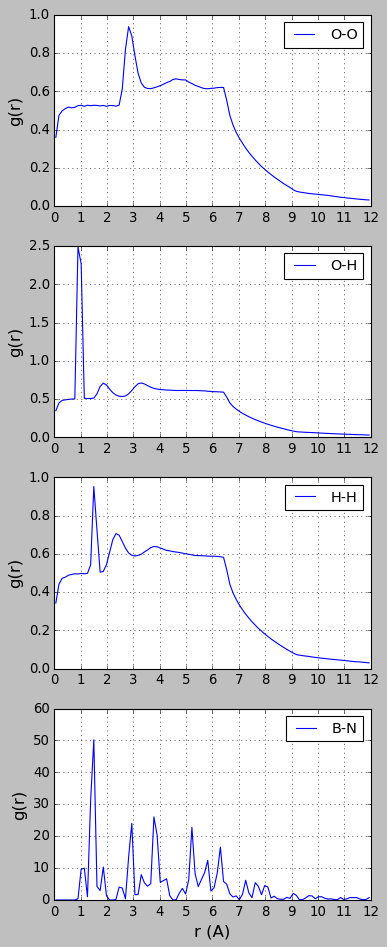

In [8]:
seltype = ['O-O', 'O-H', 'H-H', 'B-N']

len_seltype = len(seltype)
fig, ax = plt.subplots(len_seltype, 1, figsize=(5,3*len_seltype), sharex=False)

# without PBC
# atl.calculate_rdf(file_name='dump.xyz', sel_type=['2', '1'], pbc_box=[0, 0, 0], r_cutoff=9)

for sel, ax0 in zip(seltype, ax):
    # PBC
    atl.calculate_rdf(file_name='dump.xyz', sel_type=sel.split('-'), 
                      pbc_box=[12.994831,    12.994831,    12.994831], 
                      r_cutoff=12, delta_z=.75, lateral=True)

    # --------------------------

    gr = np.loadtxt('gr.dat')
    # print(gr)
    ax0.plot(gr[:,0], gr[:,1], '-b', label=sel)
    ax0.grid()
    ax0.set_ylabel('g(r)', fontsize=15)
    ax0.legend(fontsize=13)
    ax0.xaxis.set_major_locator(MultipleLocator(1))
    print (gr[np.argmax(gr[:,1]), 0])
    
plt.xlabel('r (A)', fontsize=15)
plt.tight_layout()
plt.savefig("rdf-lateral.png")

# rdf = np.loadtxt("rdf-exp.dat")
# ax[0].plot(rdf[:,0], rdf[:,1])

### Z-density profile

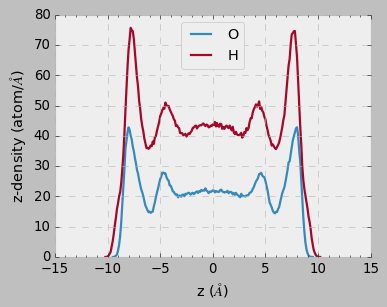

In [158]:
fig, ax = plt.subplots(figsize=(5,4))

seltype = ['O', 'H']

for sel in seltype:
    zden = np.loadtxt('zdens-%s.dat'%sel)
    x, y = atl.smooth_data(zden[:,0]-10,zden[:,1], 1)
    # print(gr)
    plt.plot(np.array(x)-np.mean(x), y, lw=2,label=sel)

# plt.grid()   
ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
plt.legend(fontsize=13, loc='upper center')
plt.tight_layout()
plt.ylabel(r'z-density (atom/$\AA$)', fontsize=13)
plt.xlabel(r'z ($\AA$)', fontsize=13)
plt.tight_layout()
plt.savefig("elem-zdens.eps")
    

### Diffusion coefficient

In [103]:
log = atl.read_log_pandas(filename="HOPPER/w103/log.lammps", run=3) # reading into pandas
log['Time'] = 0.0005*log['Step']
print(log.columns)
log = log[1:]

Index(['Step', 'Temp', 'TotEng', 'Press', 'v_dens', 'c_msd[4]', 'v_Dlat',
       'Time'],
      dtype='object')


Diffusion coefficient (A^2/ps) =  0.299511884


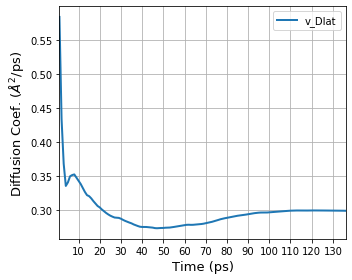

In [16]:
fig, ax = plt.subplots(figsize=(5,4))

# log.plot('Time','TotEng')
log.plot('Time','v_Dlat', ax=ax, lw=2)

plt.grid()   
ax.xaxis.set_major_locator(MultipleLocator(10))
plt.ylabel('Diffusion Coef. ($\AA^2$/ps)', fontsize=13)
plt.xlabel('Time (ps)', fontsize=13)
# plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("diffusion.png")

print ("Diffusion coefficient (A^2/ps) = ", log['v_Dlat'][-10:].mean())

### Friction coefficient

In [10]:
# fig, ax = plt.subplots(figsize=(5,4))
# # log.plot('Time','TotEng')
# log.plot("Time", "v_ksi", ax=ax, lw=2)

# plt.grid()   
# ax.xaxis.set_major_locator(MultipleLocator(10))
# plt.ylabel('$\lambda$ (10$^4$ N.s/m$^3$)', fontsize=13)
# plt.xlabel('Time (ps)', fontsize=13)
# # plt.legend(fontsize=12)
# plt.savefig("friction.png")

# print ("Friction coefficient (10E4 N.s/m3) = ", log['v_ksi'][-10:].mean())

### HBonds

3.326844660194175


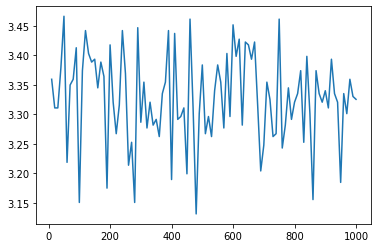

In [87]:
hb = np.loadtxt('hb.dat')
plt.plot(hb[:,0], (hb[:,1]/hb[:,2]*2))
print (np.mean(hb[:,1]/hb[:,2]*2))

## Impact of the confinement

In [2]:
# atomic tools library
import atl

import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
plt.style.use('classic')

import os

### LAMMPS Log File

In [3]:
def read_param(filename, param, run, n_ave=1, plot=False, ax=None):
    log = atl.read_log_pandas(filename, run=run) # reading into pandas
    log['time (ps)'] = log['Step'] * 0.0005
    if plot:
        log[10:].plot('time (ps)', param, lw=2, label=filename, ax=ax)
        plt.legend(fontsize=8, loc='upper center')
    return log[param][-n_ave:].mean()

In [32]:
# wat = ["w18", "w20", "w24", "w29", "w33", "w46", "w56", "w64", "w73", "w84", "w95", "w103"]
wat = ["w16", "w18", "w20", "w24", "w27", "w29", "w33", "w35", "w40", 
       "w46", "w56", "w64", "w73", "w84", "w95", "w103"] # "w31"
# wat = ["w18", "w20", "w24", "w33", "w46", "w56", "w103"]

def read_params(param, run, path="hopper/EMD/uc4x4x1/", n_ave=100, plot=False, gap=False, ax=None):
    params = []
    for w in wat:
#         print(w)
        value = read_param(filename=path+"%s/md.out"%w, param=param, run=run, n_ave=n_ave, plot=plot, ax=ax)
        if gap and (int(w[1:])<=56) and (param == "Lz"):
            value /= 2.0
        params.append( value )
    return np.array(params)

In [33]:
dis = read_params("Lz", 2, gap=True)
den = read_params("v_dens", 2) 

nwat_h = {}
i = 0;
for w in wat:
    nwat_h[w] = dis[i]
    i += 1
    
out =''    
for n in nwat_h.keys():
    out += "%1.1f, "%nwat_h[n]
print (out)

7.2, 7.4, 7.7, 8.6, 9.4, 9.9, 10.4, 10.5, 11.0, 12.2, 14.3, 15.6, 17.3, 19.2, 21.0, 22.6, 


### Energy

In [6]:
eng = read_params("PotEng", 1, path="hopper/EMD/uc2x2x1/", n_ave=10, plot=False)
nlayer = read_params("v_nlayer", 1, path="hopper/EMD/uc2x2x1/", n_ave=1, plot=False)
nw = np.array([int(w[1:])*n*4.0 for w,n in zip(wat, nlayer)])
print (nw)

[144. 160. 192. 264. 368. 448. 412.]


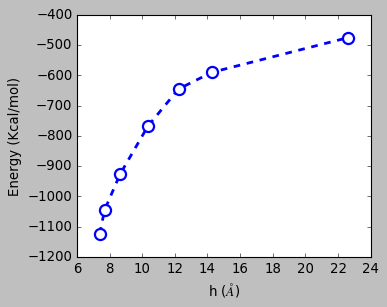

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(dis, eng/nw, 'bo--', lw=2.5, ms=10, mec='b', mfc='w', mew=2)

# # bulk
# plt.axhline(0.2, ls='--', color='gray')
# plt.text(7, 0.21, 'bulk', color='gray', fontsize=15)

plt.ylabel("Energy (Kcal/mol)")
plt.xlabel("h ($\AA$)")
plt.tight_layout()
# plt.savefig("diffusion.png")
# plt.savefig("diffusion.eps")

## Ensemble

In [34]:
# import matplotlib as mpl
# from cycler import cycler

# mpl.rcParams.update(
#     {
#         "axes.prop_cycle": cycler('color', [
#             "#332288", "#88CCEE", "#44AA99" #, 117733, 999933, DDCC77, CC6677, 882255, AA4499
#         ]),
#     }
# )

In [40]:
def calc_ensemble(param, path='hopper/EMD/ensemble/'):
    all_ = []
    for s in ['%2.2d'%(_+1) for _ in range(6)]:
        print(s)
        all_.append(read_params(param, 3, path=path+s+"/", n_ave=10, plot=False))
    return np.array(all_)

### Diffusion

01
02
03
04
05
06
[0.8659400605000002, 0.5851275204999999, 0.6362585141666667, 0.5208815216666668, 0.3969038866666666, 0.2130443516666667, 0.17970960011666667, 0.13474095356666665, 0.18511357858333333, 0.3696417955, 0.33454069966666666, 0.22180550899999998, 0.22934596833333332, 0.2188021401666667, 0.21882278816666667, 0.21520509566666665]


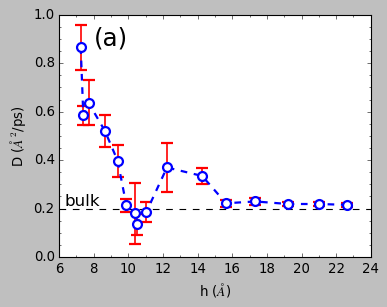

In [41]:
fig, ax = plt.subplots(figsize=(5,4))
dfu_all = calc_ensemble("v_Dlat")
dfu_mean = np.mean(dfu_all, axis=0)
dfu_std = np.std(dfu_all, axis=0)*0.7
dis, dfu_mean = atl.smooth_data(dis, dfu_mean, n_ave=1)
(_, caps, _) = plt.errorbar(dis, dfu_mean, yerr=dfu_std, ls='--', marker='o', lw=2., ms=8, mec='b', 
             mfc='w', mew=2, label="self-diffusion", capsize=5, elinewidth=1.5, ecolor='red')
print(dfu_mean)

# for cap in caps:
#     cap.set_color('red')
#     cap.set_markeredgewidth(2)
    
# bulk
plt.axhline(0.2, ls='--', color='k')#, label='bulk')
plt.text(6.3, 0.21, 'bulk', color='k', fontsize=15)

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

plt.text(8, 0.875, '(a)', color='k', fontsize=22)
plt.ylabel("D ($\AA^2$/ps)")
plt.xlabel("h ($\AA$)")
# plt.legend(fontsize=12, numpoints=1)
# plt.grid()
plt.tight_layout()
# plt.savefig("diffusion.png")
plt.savefig("diffusion.eps")

### Friction

01
02
03
04
05
06


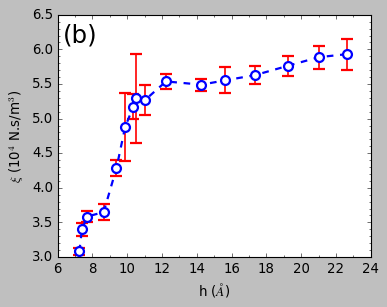

In [42]:
fig, ax = plt.subplots(figsize=(5,4))
dfu_all = calc_ensemble("v_ksi")
dfu_mean = np.mean(dfu_all, axis=0)
dfu_std = np.std(dfu_all, axis=0)*0.7
dis, dfu_mean = atl.smooth_data(dis, dfu_mean, n_ave=2)
(_, caps, _) = plt.errorbar(dis, dfu_mean, yerr=dfu_std, ls='--', marker='o', lw=2., ms=8, mec='b', 
             mfc='w', mew=2, label="friction", capsize=5, elinewidth=1.5, ecolor='red')

# for cap in caps:
#     cap.set_color('red')
#     cap.set_markeredgewidth(2)
    
# bulk
# plt.axhline(0.2, ls='--', color='k')
# plt.text(7, 0.21, 'bulk', color='k', fontsize=15)

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.text(6.3, 6.1, '(b)', color='k', fontsize=22)
plt.ylabel(r"$\xi$ (10$^4$ N.s/m$^3$)")
plt.xlabel("h ($\AA$)")
# plt.grid()
# plt.legend(fontsize=12, loc='lower right', numpoints=1)
plt.tight_layout()
# plt.savefig("friction.png")
plt.savefig("friction.eps")

### Diffusion coefficient

In [8]:
# read_param("HOPPER/EMD/w18/md.out","v_Dlat", n_ave=10, run=3, plot=True)

(0, 800)

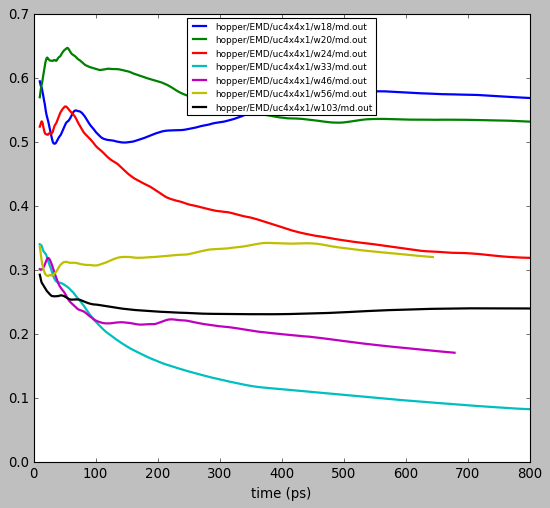

In [10]:
fig, ax = plt.subplots(figsize=(8,7))
dfu = read_params("v_Dlat", 3, path="hopper/EMD/uc4x4x1/", n_ave=10, plot=True, ax=ax)
plt.xlim([0, 800])

14.261569000000007


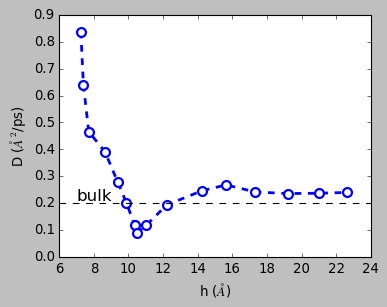

In [301]:
fig, ax = plt.subplots(figsize=(5,4))
dis, dfu = atl.smooth_data(dis, dfu, n_ave=2)
plt.plot(dis, dfu, 'bo--', lw=2.5, ms=8, mec='b', mfc='w', mew=2)

# bulk
plt.axhline(0.2, ls='--', color='k')
plt.text(7, 0.21, 'bulk', color='k', fontsize=15)

plt.ylabel("D ($\AA^2$/ps)")
plt.xlabel("h ($\AA$)")
plt.tight_layout()
# plt.savefig("diffusion.png")
plt.savefig("diffusion.eps")
print (nwat_h["w56"])

### Friction coefficient

In [177]:
# read_param("HOPPER/TEST_FRICTION/md.out","v_ksi", n_ave=100, run=3, plot=True)

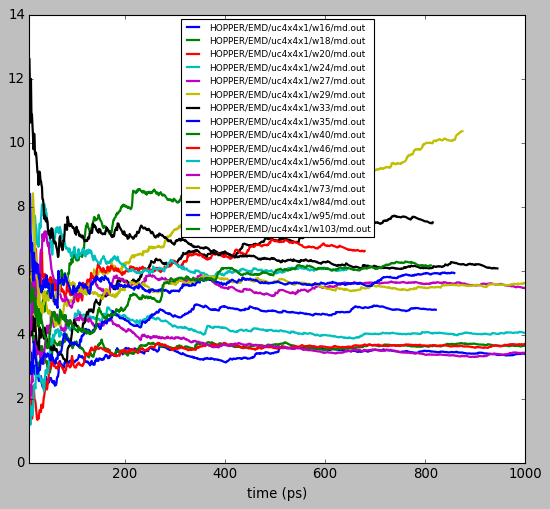

In [304]:
fig, ax = plt.subplots(figsize=(8,7))
ksi = read_params("v_ksi", 3, path="HOPPER/EMD/uc4x4x1/", n_ave=10, plot=True, ax=ax)

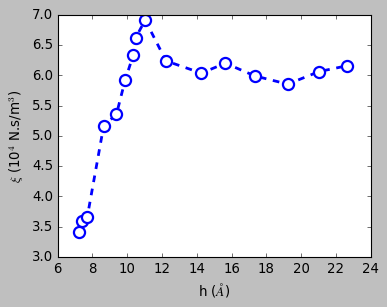

In [305]:
fig, ax = plt.subplots(figsize=(5,4))
dis, ksi = atl.smooth_data(dis, ksi, 4)
plt.plot(dis, ksi,'bo--', lw=2.5, ms=10, mec='b', mfc='w', mew=2)

plt.ylabel(r"$\xi$ (10$^4$ N.s/m$^3$)")
plt.xlabel("h ($\AA$)")
plt.tight_layout()
# plt.savefig("friction.png")
plt.savefig("friction.eps")

### Structure: Lateral-RDF

w18 --> 2.840
w20 --> 2.840
w24 --> 2.840
w33 --> 2.840
w46 --> 2.840
w56 --> 2.840
w103 --> 2.840


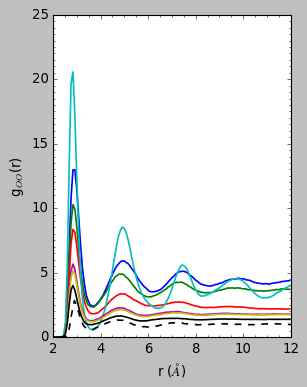

In [29]:
def calculate_rdf(file_name, sel, pbc_box):
    atl.calculate_rdf(file_name=file_name, sel_type=sel.split('-'), nr_mesh=150,
                      pbc_box=pbc_box, r_cutoff=12, delta_z=.75, lateral=True)
    gr = np.loadtxt('gr.dat')
    return gr[:, 1], gr[:, 0]

fig, ax = plt.subplots(figsize=(4,5))
peak1 = []
shift = 0
for w in wat[::]:
    # get box sizes
    path = "hopper/EMD/uc2x2x1/%s/"%w
    box = [read_param(path+"log.lammps", d, 2, n_ave=1) for d in ["Lx", "Ly", "Lz"]]
    # calculate lateral-RDF
    os.system("cp %sdump.xyz ."%path)
    gr, r = calculate_rdf("dump.xyz", 'O-O', box)
    peak1.append(max(gr))
    # plot 
    plt.plot(r, gr, label="%3.1f $\AA$"%nwat_h[w], lw=1.5)
    shift += 5
    print("%s --> %5.3f"%(w, r[np.argmax(gr)]))


# bulk
gr= np.loadtxt('bulk/02_lammps_scripts/nnp/gr-oo.dat')
plt.plot(gr[:,0]*1.075, gr[:,1], label="bulk", lw=1.5, ls='--', color='k')
    
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# plt.yticks([])
plt.ylabel("g$_{OO}$(r)")
plt.xlabel("r ($\AA$)")
plt.xlim([2, 12])
# plt.legend()
plt.tight_layout()
# plt.savefig("rdf-all.png")
plt.savefig("rdf-all.eps")

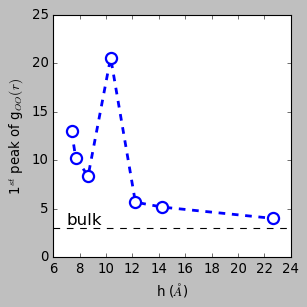

In [28]:
fig, ax = plt.subplots(figsize=(4,4))
peak1 = np.array(peak1)
plt.plot(dis, peak1, 'o--', lw=2.5, ms=10, mfc='w', mew=2, mec='b')

# bulk
plt.axhline(3.0, ls='--', color='k')
plt.text(7, 3.3, 'bulk', color='k', fontsize=15)

# plt.yticks([])
plt.ylabel("1$^{st}$ peak of g$_{OO}(r)$")
plt.xlabel("h ($\AA$)")
plt.tight_layout()
# plt.savefig("rdf-all.png")
plt.savefig("rdf-peak.eps")

### Structure: Density profile

In [13]:
def find_boundary_index(y):
    n = len(y);
    il = 0; ir=n-1;
    for i in range(n-1):
        if y[i+1] > y[i]:
            il = i
            break;
    for i in range(n-1,0,-1):
        if y[i-1] > y[i]:
            ir = i
            break;
    #print (il, ir)
    return il, ir

def recenter(y, x):
    il, ir = find_boundary_index(y)   
    x -= (x[il]+x[ir])*0.5       # shift to center
    return y[il:ir], x[il:ir]  # ignore out-of-boudary data

w18 --> -0.150
w20 --> 0.750
w24 --> 0.600
w33 --> 2.850
w46 --> -5.550
w56 --> -7.500
w103 --> -15.900


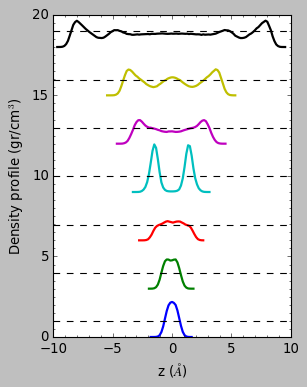

In [14]:
def calculate_zden(file_name, sel):
    atl.calculate_zden(file_name=file_name, sel_type=sel, zlim=[-0, 30], nz=200)
    zden = np.loadtxt('zden.dat')
    return zden[:, 1], zden[:, 0]

fig, ax = plt.subplots(figsize=(4,5))
shift = 0
for i, w in enumerate(wat[::]):
    # get box sizes
    path = "hopper/EMD/uc2x2x1/%s/"%w
    # calculate lateral-RDF
    os.system("cp %sdump.xyz ."%path)
    den, z = calculate_zden("dump.xyz", 'O')
    den, z = recenter(den, z)
    if int(w[1:])<=56:
        nh = int(len(den)/2)
        den, z = den[:nh], z[:nh]
        den, z = recenter(den, z)
    # plot 
    
    box = [read_param(path+"log.lammps", d, 2, n_ave=1) for d in ["Lx", "Ly", "Lz"]]
    mass_h2o = 18.02/6.023E23 # gr
    area = box[0]*box[1] # A^2
    rho = den/area*mass_h2o*1e24 # gr/cm^3
    rho_bulk = 0.98
    
    plt.plot(z, rho+shift, label="%3.1f $\AA$"%nwat_h[w], lw=2)
    plt.axhline(rho_bulk+shift, color='k', ls='--')
    shift += 3
    
    print("%s --> %5.3f"%(w, z[np.argmax(rho[-1::-1])]-z[np.argmax(rho)]))
    
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
      
# plt.yticks([])
plt.ylabel("Density profile (gr/cm$^3$)")
plt.xlabel("z ($\AA$)")
# plt.xlim([2, 12])
# plt.legend()
plt.tight_layout()
# plt.savefig("zden-all.png")
plt.savefig("zden-all.eps")

### H-bonds

/home/hossein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


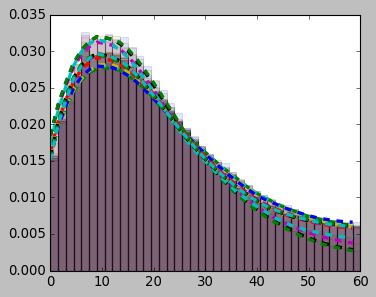

In [139]:
fig, ax = plt.subplots(figsize=(5,4))

def calculate_hbond(file_name, pbc_box):
    atl.calculate_hbond(file_name=file_name, sel_type=['O', 'H', 'O'], pbc_box=pbc_box, 
                      criteria=[3.5, 2.5, 30.0], z_confined=True, dump_angle=True, frames=[1, 100000, 10])
    hb = np.loadtxt('hb.dat')

    h = plt.hist(np.loadtxt("angle.dat")%90., bins=40, normed=True, range=(0, 60), alpha=0.1)
    x, y = atl.smooth_data(h[1][:-1], h[0], 3)
    plt.plot(x, y, '--', lw=3)
    
    return hb[:, 1]/(hb[:,2])*2, np.c_[x, y]

hb_vs_h = [];
ang_dist = {};
for w in wat[::]:
    # get box sizes
    path = "hopper/EMD/uc2x2x1/%s/"%w
    box = [read_param(path+"log.lammps", d, 2, n_ave=1) for d in ["Lx", "Ly", "Lz"]]
    # calculate lateral-RDF
    os.system("cp %sdump.xyz ."%path)
    hb, ang = calculate_hbond("dump.xyz", box)
    hb_vs_h.append( [int(w[1:]), np.mean(hb)] )
    ang_dist[w] = ang
    #print (hb_vs_h[-1])
    # plot
    #plt.plot(hb, label=w, lw=1.5)
    
dis = read_params("Lz", 2, gap=True)

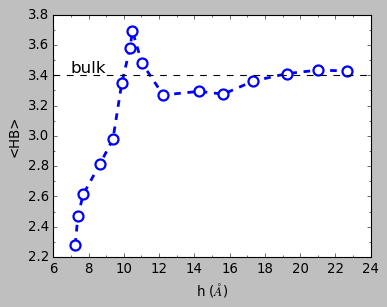

In [140]:
fig, ax = plt.subplots(figsize=(5,4))
hb_vs_h = np.array(hb_vs_h)
plt.plot(dis, hb_vs_h[:,1], 'o--', lw=2.5, ms=9, mfc='w', mew=2, mec='b')

# bulk
plt.axhline(3.4, ls='--', color='k')
plt.text(7, 3.42, 'bulk', color='k', fontsize=15)

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# # plt.yticks([])
plt.ylabel("<HB>")
plt.xlabel("h ($\AA$)")
# plt.xlim([2, 12])
# plt.legend()
plt.tight_layout()
# plt.savefig("h-bonds.png")
plt.savefig("h-bonds.eps")

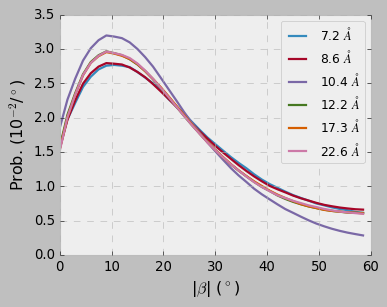

In [156]:
fig, ax = plt.subplots(figsize=(5,4))
# print (ang_dist.keys())
for w in wat[::3]:
#     print (ang_dist[w][:,1])
    prob = ang_dist[w][:,1]
    beta = ang_dist[w][:,0]
    plt.plot(beta, prob*100, '-', lw=2, label="%3.1f $\AA$"%nwat_h[w])
#     print(np.sum(prob*(beta[1]-beta[0])))

# bulk
# plt.axhline(3.4, ls='--', color='gray')
# plt.text(7, 3.42, 'bulk', color='k', fontsize=15)

# plt.yticks([])
plt.ylabel(r"Prob. (10$^{-2}$/$^\circ$)")
plt.xlabel(r"|$\beta$| ($^\circ$)")
# plt.grid()
plt.legend(fontsize=11)
plt.tight_layout()
# plt.savefig("angle_dist.png")
plt.savefig("angle-dist.eps")

### H-Bond profile

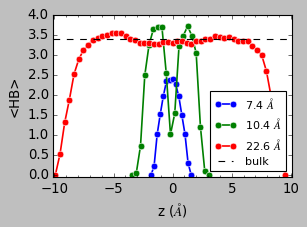

In [140]:
fig, ax = plt.subplots(figsize=(4,3))

def calculate_hbond(file_name, pbc_box):
    atl.calculate_hbond_profile(file_name=file_name, sel_type=['O', 'H', 'O'], pbc_box=pbc_box, 
                        criteria=[3.5, 2.5, 30.0], zlim=[0, pbc_box[2]+1], nz=60, 
                        frames=[1, 100000, 10])
    hb = np.loadtxt('hb-prof.dat')
    return hb[:,0], hb[:,1]/(hb[:,2]+1)*2

hb_vs_h = [];
shift=0
for w in ['w%d'%_ for _ in [18, 33, 103]]:#wat[-1::]:
    
    # get box sizes
    path = "hopper/EMD/uc2x2x1/%s/"%w
    box = [read_param(path+"log.lammps", d, 2, n_ave=1) for d in ["Lx", "Ly", "Lz"]]
    # calculate lateral-RDF
    os.system("cp %sdump.xyz ."%path)
    z, hb = calculate_hbond("dump.xyz", box)
    
    hb, z = recenter(hb, z)
    if int(w[1:])<=56:
        nh = int(len(hb)/2)
        hb, z = hb[:nh], z[:nh]
        hb, z = recenter(hb, z)
        
    # plot
    n_ave = 3
    if w in ['w33']:
        n_ave = 1
    z, hb = atl.smooth_data(z, hb, n_ave=n_ave)
  
    plt.plot(z, np.array(hb), '-o', label="%3.1f $\AA$"%nwat_h[w], lw=1.5, mec='w') 
    shift+=4
    
plt.axhline(3.4, color='k', ls='--', label='bulk')


# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
    
# dis = read_params("Lz", 2, gap=True)
plt.legend(loc="lower right", fontsize=10)
plt.ylabel("<HB>")
plt.xlabel("z ($\AA$)")
plt.ylim([-0.05, 4.0])
plt.xlim([-10.1, 10.1])

plt.tight_layout()
# plt.savefig("angle_dist.png")
plt.savefig("hbond-profile.eps")

### NEMD: Flow

In [21]:
# read_param("HOPPER/FLOW/f0.1/w16/log.lammps","v_vcm", n_ave=10, run=3, plot=True)

In [48]:
# wat = ["w16", "w18", "w20", "w24", "w27", "w29", "w33", "w31", "w35", "w40", 
#        "w46", "w56", "w64", "w73", "w84", "w95", "w103"]
# dis = read_params("Lz", 2, gap=True)

In [43]:
vcm = {}
for flow in ["f0.05", "f0.1", "f0.25", "f0.5"]: # "f0.025"
    vcm[flow] = read_params("v_vcm", 3, path="hopper/NEMD/%s/"%flow, n_ave=1, plot=False)

In [44]:
# nlayer = read_params("v_nlayer", 1, path="HOPPER/EMD/uc2x2x1/", n_ave=1, plot=False)
# nw = np.array([int(w[1:])*n*4.0 for w,n in zip(wat, nlayer)])

# pcm = np.array([v*int(nw[1:])*18. for v,nw in zip(vcm, wat)])
# Ly = read_params("Ly", 2, path="HOPPER/FLOW/f0.5/", n_ave=1, plot=False)
# Lx = read_params("Lx", 2, path="HOPPER/FLOW/f0.5/", n_ave=1, plot=False)
# mass = np.array([4*int(w[1:])*18.0 for w in wat])
# area = np.array([l*d for l,d in zip(Ly, dis)])
# rho  = ave_den/area/Lx
# print(area, mass, rho)

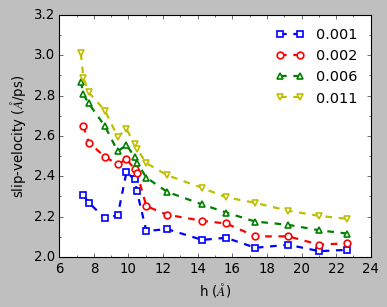

In [91]:
fig, ax = plt.subplots(figsize=(5,4))
clrs = ['b', 'r', 'g', 'y']
syms = ['s', 'o', '^', 'v']
for i,flow in enumerate(vcm.keys()):   
    flow_rate = float(flow[1:])* 0.043 * 0.529177 # eV/Bohr
    if i==0 or i==1:
        dis_ = dis.copy()[1:]
        vcm_ = vcm[flow][1:]
    else:
        dis_ = dis.copy()
        vcm_ = vcm[flow]
        
#     color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(dis_,vcm_,f'{syms[i]}--', lw=2, ms=6, mew=1.5, color=clrs[i],
             mec=clrs[i], label="{:2.3f}".format(flow_rate), mfc='w')
    
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.ylabel("slip-velocity ($\AA$/ps)")
plt.xlabel("h ($\AA$)")
plt.legend(fontsize=13, frameon=False)
plt.tight_layout()
# plt.savefig("permea.png")
plt.savefig("slip-velocity.eps")

### Velcocity Profile

In [308]:
def read_frame(fp):
    """Read a frame of lammps custom dump."""
    data = []
    for line in fp:        
        if not line:
            break;
        if "ITEM: NUMBER OF ATOMS" in line:
            n_atoms = int(next(fp))
            #print (n_atoms)
        if "ITEM: ATOMS id z vx" in line:
            for i in range(0, n_atoms, 3): # only O atoms
                token = next(fp).rstrip("/n").split()
                data.append([float(_) for _ in token[1:3]])
                next(fp); next(fp);  # skip lines for H atoms
            break
    return np.array(data)

In [309]:
def calc_profile(file_name, z_range=[], n_mesh=200, frames=[1, 1000000]):
    """Velocity (x) density profile along z-axis."""
    fp = open(file_name, "r")
    h = np.linspace(z_range[0], z_range[1], n_mesh+1)
    vel = np.zeros(n_mesh)
    no = np.zeros(n_mesh) + 1e-8 # eps
    n_frame = 0; n_frame_read = 0
    while True:   
        # read frame
        data = read_frame(fp)
        n_frame += 1
        if n_frame < frames[0]:
            continue;
        n_data = len(data)
        if (n_data == 0) or (n_frame > frames[1]):
            print ("last read frame: ", n_frame_read-1)
            break
        z, vx = data[:,0], data [:,1]
        
        # read frames
        n_frame_read += 1
        if n_frame_read%500==0:
            print ("read frame: ", n_frame_read)
        # profile
        for i in range(n_data):
            for j in range(n_mesh):
                if z[i]>=h[j] and z[i]<h[j+1]:
                    vel[j] += vx[i]
                    no[j] += 1.0
                    break        
    
    vel /= no  # average over number of water and time
    no  /= n_frame_read  # average over time
    
    #vel /= n_frame # average along frames
    return h[:-1], vel, no

w18
read frame:  500
read frame:  1000
read frame:  1500
read frame:  2000
read frame:  2500
last read frame:  2900

w33
read frame:  500
read frame:  1000
read frame:  1500
read frame:  2000
read frame:  2500
last read frame:  2900

w84
read frame:  500
read frame:  1000
read frame:  1500
read frame:  2000
read frame:  2500
last read frame:  2900



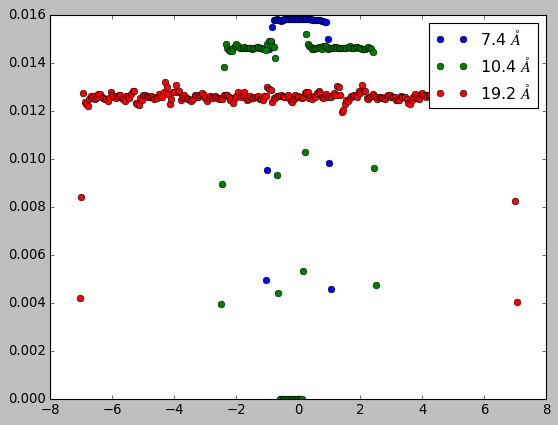

In [310]:
for w in ["w18", "w33", "w84"]:
    print(w)
    h, vx, no = calc_profile("HOPPER/EMD/vel_profile/%s/profile.dat"%w, [0.0, 25.0], 500, [100, 3000])
    h, vx = atl.smooth_data(h, vx, 2)
    vx, h = recenter(vx, h)
    if int(w[1:])<=56:
        nh = int(len(vx)/2)
        vx, h = vx[:nh], h[:nh]
        vx, h = recenter(vx, h)
    
    plt.plot(h[1:], vx[1:], 'o-', lw=2, label="%3.1f $\AA$"%nwat_h[w])
    # plt.axhline(np.mean(vx), c='k', ls='--')
    print()
    
plt.legend()

In [151]:
# h, no = atl.smooth_data(h, no, 1)
# plt.plot(h, no)

## Other Force Fields

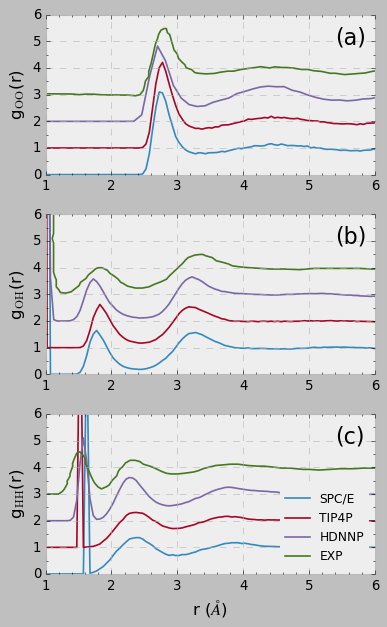

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# import matplotlib
# matplotlib.rc('xtick', labelsize=15.)
# matplotlib.rc('ytick', labelsize=15.)
# matplotlib.rcParams['xtick.major.width'] = 2.0
# matplotlib.rcParams['xtick.major.size'] = 6.
# matplotlib.rcParams['ytick.major.width'] = 2.
# matplotlib.rcParams['ytick.major.size'] = 6.
# matplotlib.rcParams['xtick.major.pad']='5'
# matplotlib.rcParams['ytick.major.pad']='8'
# import pylab; pylab.rc("axes", linewidth=2.0)

#import os
#os.system("gfortran 01_bumpLineProfile.f90 && ./a.out && rm a.out")

# -------------------------

fig,(ax00)=plt.subplots(3, 1, figsize=(5,8))

#########################################################

#'00_bulk-water-spce','00_bulk-water-tip3p',
samples=['spce', 'tip4p', 'nnp', 'exp']#,'tip4p','tip5p']#,'pw','05-bulk-water-cpmd']#,'pure-water']
# sm=['s','o','^','v','.','x']
# cl=['b','r','g','m','c','k']
tags=[]

for j,sel in enumerate(['oo','oh','hh']):

    shift = 0
#     plt.subplot(3, 1, j+1)
    for i in range(len(samples)):

        d=np.loadtxt("bulk/02_lammps_scripts/"+"%s/gr-%s.dat"%(samples[i],sel))
        tags.append( samples[i].upper() )#.upper() )

        #d=d[::2,:]
        r=d[:,0] #/10 #nm
        rdf=d[:,1]#/100. #nm2
        r, rdf = atl.smooth_data(r, rdf+shift, n_ave=1)

        ax00[j].plot(r,rdf,'-',lw=1.5, markersize=5, mfc='w', mew=1)
        shift += 1

    ax00[j].set_ylabel(r"g$_{\mathrm{%s}}$(r)"%sel.upper(), fontsize=15)
#     ax00[j].grid()
    ax00[j].set_xlim([1.0, 6])
    ax00[j].set_ylim([0,6])
    ax00[j].text(5.4, 3+1.9, ["(a)", "(b)", "(c)"][j], fontsize=20)
    
    ax00[j].xaxis.set_minor_locator(MultipleLocator(0.2))
    ax00[j].yaxis.set_minor_locator(MultipleLocator(0.5))

plt.xlabel("r ($\AA$)", fontsize=15)

    
# print 'Data:',len(d[:,0])
tags[0]='SPC/E'
tags[2]='HDNNP'
leg=plt.legend(tags, loc='lower right', fontsize=11, numpoints=1)
leg.get_frame().set_linewidth(0.0)


plt.tight_layout()
# plt.savefig("permea.png")
plt.savefig("rdf-ff.eps")

### Lateral-RDF bulk

0.9
1.5
2.82


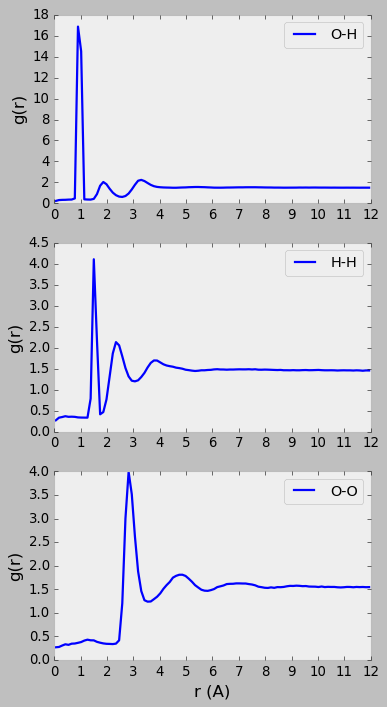

In [152]:
seltype = ['O-H', 'H-H','O-O']

len_seltype = len(seltype)
fig, ax = plt.subplots(len_seltype, 1, figsize=(5,3*len_seltype), sharex=False)

# without PBC
# atl.calculate_rdf(file_name='dump.xyz', sel_type=['2', '1'], pbc_box=[0, 0, 0], r_cutoff=9)

for sel, ax0 in zip(seltype, ax):
    # PBC
    atl.calculate_rdf(file_name='dump.xyz', sel_type=sel.split('-'), 
                      pbc_box=[25.989663,    25.989663,    25.989663], 
                      r_cutoff=12, delta_z=.75, lateral=True)

    # --------------------------

    gr = np.loadtxt('gr.dat')
    # print(gr)
    ax0.plot(gr[:,0], gr[:,1], '-b', label=sel)
    ax0.grid()
    ax0.set_ylabel('g(r)', fontsize=15)
    ax0.legend(fontsize=13)
    ax0.xaxis.set_major_locator(MultipleLocator(1))
    print (gr[np.argmax(gr[:,1]), 0])
    
plt.xlabel('r (A)', fontsize=15)
plt.tight_layout()
plt.savefig("rdf-lateral.png")

# rdf = np.loadtxt("rdf-exp.dat")
# ax[0].plot(rdf[:,0], rdf[:,1])